# SENTIMENT ANALYSIS-IMDB REVIEWS
BY AAKANKSHA KASHAYAP(21052466) AND RITIKA RANI(21051016)

# import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split as tts
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics import roc_curve, roc_auc_score

# load the dataset

In [2]:
data=pd.read_csv('IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


there is no null values in dataset.

In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

dataset is equally divided for positive and negative reviews.

In [6]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [7]:
data.shape

(50000, 2)

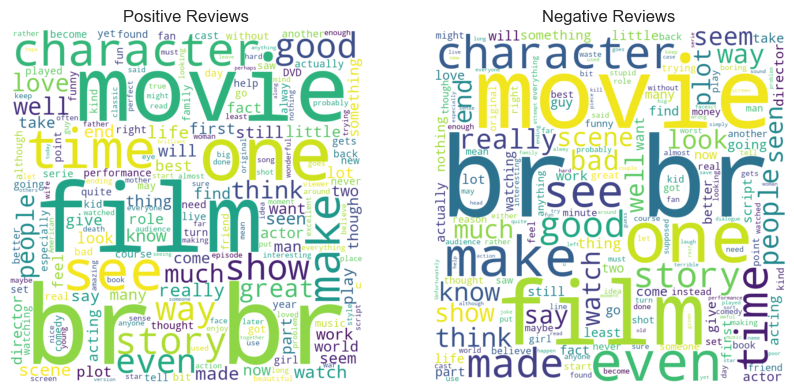

In [8]:
from wordcloud import WordCloud
#wordcloud to analyse which words are common and different in both positive and negative reviews.
# Filter positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']['review']
negative_reviews = data[data['sentiment'] == 'negative']['review']

# Join all positive and negative reviews into single strings
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

# Generate word clouds for positive and negative reviews
wordcloud_positive=WordCloud(width=800,height=800,background_color='white',stopwords=None,min_font_size=10).generate(positive_text)
wordcloud_negative=WordCloud(width=800,height=800,background_color='white',stopwords=None,min_font_size=10).generate(negative_text)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Positive word cloud
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Reviews')
axes[0].axis('off')

# Negative word cloud
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Negative Reviews')
axes[1].axis('off')

plt.show()

# Processing the data

In [9]:
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)

In [10]:
data['review']=pd.DataFrame(data.review.apply(cleaned1))

In [11]:
data.head(15)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [12]:
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned2=lambda x:clean_text2(x)

In [13]:
data['review']=pd.DataFrame(data.review.apply(cleaned2))
data.head(15)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [14]:
x_review = data.iloc[0:,0].values
y_sentiment = data.iloc[0:,1].values

In [15]:
x_train,x_test,y_train,y_test = tts(x_review,y_sentiment,test_size = 0.20,random_state = 41)

# Extracting the data

In [16]:
tf = TfidfVectorizer()
from sklearn.pipeline import Pipeline

In [17]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Modeling-Logistic regression 

In [18]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
model_logistic=Pipeline([('vectorizer',tf),('classifier',classifier)])
model_logistic.fit(x_train,y_train_encoded)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [19]:
y_pred=model_logistic.predict(x_test)

In [20]:
# model score
accuracy_score(y_pred,y_test_encoded)

0.8977

In [21]:
conf_mat=confusion_matrix(y_test_encoded,y_pred)
print(conf_mat)

[[4421  559]
 [ 464 4556]]


In [22]:
# f1 score
recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
F1=2*recall*precision/(recall+precision)
print(recall)
print(precision)
print(F1)

0.9050153531218015
0.8877510040160642
0.8963000506842371


# Modeling-Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

classifier=DecisionTreeClassifier(max_depth=20,min_samples_split=10,min_samples_leaf=5)
model_decisiontree = Pipeline([('vectorizer', TfidfVectorizer(max_features=10000)), ('classifier', classifier)])

model_decisiontree.fit(x_train, y_train_encoded)


Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=10000)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=20, min_samples_leaf=5,
                                        min_samples_split=10))])

In [24]:
y_pred=model_decisiontree.predict(x_test)

In [25]:
accuracy_score(y_pred,y_test_encoded)

0.7351

In [26]:
conf_mat=confusion_matrix(y_test_encoded,y_pred)
print(conf_mat)

[[3295 1685]
 [ 964 4056]]


In [27]:
recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
F1=2*recall*precision/(recall+precision)
print(recall)
print(precision)
print(F1)

0.7736557877436018
0.6616465863453815
0.7132806580798787


# Modeling-Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
model_linear= Pipeline([('vectorizer', TfidfVectorizer()), ('regressor', regressor)])
model_linear.fit(x_train, y_train_encoded)

y_pred = model_linear.predict(x_test)
mse = mean_squared_error(y_test_encoded, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1828266194890447


# Modeling-Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

model_naivebayes=Pipeline([('vectorizer',TfidfVectorizer()),('classifier',classifier)])
model_naivebayes.fit(x_train, y_train_encoded)
y_pred=model_naivebayes.predict(x_test)
accuracy_score(y_pred,y_test_encoded)

0.8615

In [30]:
conf_mat=confusion_matrix(y_test_encoded,y_pred)
print(conf_mat)

[[4423  557]
 [ 828 4192]]


In [31]:
recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
F1=2*recall*precision/(recall+precision)
print(recall)
print(precision)
print(F1)

0.8423157493810702
0.8881526104417671
0.8646271136741276


# Modeling-KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)
model_knn=Pipeline([('vectorizer',TfidfVectorizer(max_features=10000)),('classifier', classifier)])
model_knn.fit(x_train, y_train_encoded)

y_pred=model_knn.predict(x_test)
accuracy_score(y_pred,y_test_encoded)

0.7465

In [33]:
conf_mat=confusion_matrix(y_test_encoded,y_pred)
print(conf_mat)

[[3511 1469]
 [1066 3954]]


In [34]:
recall=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
precision=conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
F1=2*recall*precision/(recall+precision)
print(recall)
print(precision)
print(F1)

0.7670963513218265
0.7050200803212852
0.7347493983467615


# Result

In [35]:
metrics_df={'Algorithms':['Logistic','knn','naive bayes','decision tree'],
           'Accuracy':[89.77,74.65,86.15,73.42],
           'Precision':[88.77,70.50,88.81,65.76],
           'Recall':[90.5,76.7,84.23,77.46],
           'F1-Score':[89.63,73.47,86.46,71.13]}
df=pd.DataFrame(metrics_df)
df

,Algorithms,Accuracy,Precision,Recall,F1-Score
0,Logistic,89.77,88.77,90.50,89.63
1,knn,74.65,70.50,76.70,73.47
2,naive bayes,86.15,88.81,84.23,86.46
3,decision tree,73.42,65.76,77.46,71.13


linear regression algorithm does not support f1 score, precision, recall, and confusion matrix for categorical variables. we hace shown calculation for mse of linear regression algorithm.<br> confusion matrix for every algorithm is also calculated.

# Plotting the ROC curve

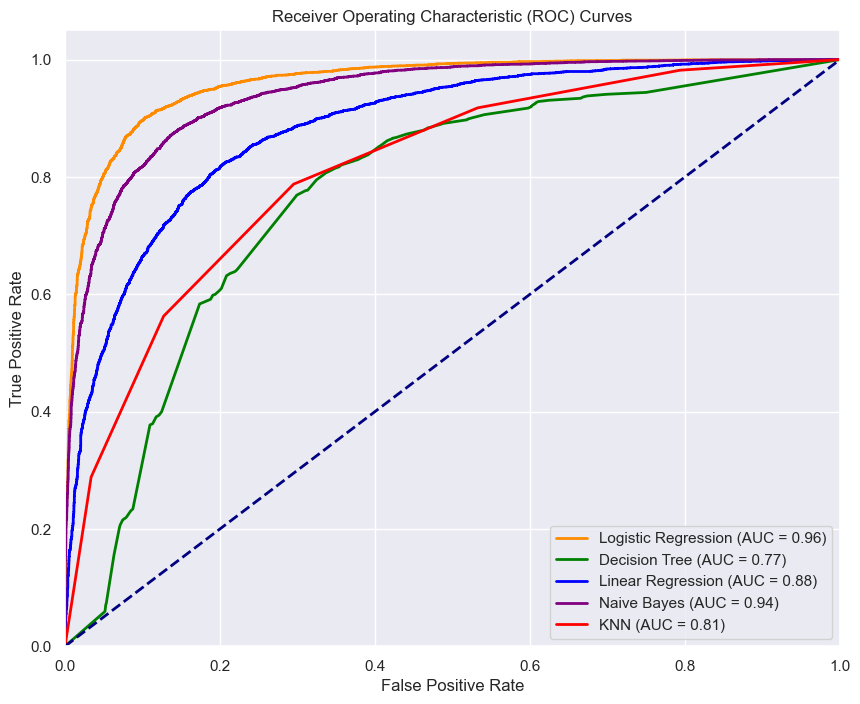

In [37]:
from sklearn.metrics import roc_curve, auc

y_prob_logistic = model_logistic.predict_proba(x_test)[:, 1]
y_prob_tree = model_decisiontree.predict_proba(x_test)[:, 1]
y_prob_linear = model_linear.predict(x_test)  # No predict_proba for Linear Regression
y_prob_nb = model_naivebayes.predict_proba(x_test)[:, 1]
y_prob_knn = model_knn.predict_proba(x_test)[:, 1]

# Compute ROC curves and ROC areas for the positive class
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test_encoded, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test_encoded, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test_encoded, y_prob_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_encoded, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_encoded, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic,tpr_logistic,color='darkorange',lw=2,label=f'Logistic Regression(AUC={roc_auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree,color='green', lw=2,label=f'Decision Tree(AUC={roc_auc_tree:.2f})')
plt.plot(fpr_linear, tpr_linear,color='blue', lw=2, label=f'Linear Regression(AUC={roc_auc_linear:.2f})')
plt.plot(fpr_nb,tpr_nb,color='purple', lw=2, label=f'Naive Bayes(AUC={roc_auc_nb:.2f})')
plt.plot(fpr_knn,tpr_knn,color='red', lw=2, label=f'KNN(AUC={roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# conclusion

1. for sentiment analysis, logistic regression has best result than other algorithms.<br>
2. we have shown f1 score, recall, precision and confusion matrix for algorithms-knn,naive bayes,logistic regression,linear regression,decision tree.<br>
3. we have plot roc curve for all above algorithms.<br>
4. wordcloud is used to show common and different words for positive and negative reviews.<br>